# Example reduction

In [1]:
import sys
import os
sys.path.append(os.path.expanduser('~/git/LiquidsReflectometer/reduction'))

import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

#%matplotlib notebook
%matplotlib ipympl

import warnings
warnings.filterwarnings('ignore', module='numpy')
warnings.filterwarnings('ignore')

In [2]:
import mantid
import mantid.simpleapi as api
mantid.kernel.config.setLogLevel(3)

logging set to error priority


In [3]:
print(mantid.__version__)
print(sys.version)

6.10.0
3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]


In [4]:
import importlib
from lr_reduction import workflow
from lr_reduction import template
from lr_reduction import output
from lr_reduction import event_reduction
from lr_reduction import reduction_template_reader
from lr_reduction import peak_finding

In [5]:
import datetime

importlib.reload(event_reduction)



ws = api.Load("REF_L_%s" % 211780)
t = ws.getRun()['start_time'].value

t = t.split('T')[0]

d = datetime.date.fromisoformat(t)
print(d)

d2 = datetime.date.fromisoformat('2024-08-25')
d3 = datetime.date.fromisoformat('2024-08-24')

delta_2 = d2-d
delta_3 = d3-d

print(delta_3<delta_2)

settings = event_reduction.read_settings(ws)
print(settings)

2024-08-29
True
{'source-det-distance': 15.282, 'sample-det-distance': 1.355, 'number-of-x-pixels': 256, 'number-of-y-pixels': 304, 'pixel-width': 0.7, 'xi-reference': 445, 's1-sample-distance': 1.485}



Processing: 211906
    DB: 212021
    DB center: 261.827	 Width: 1 from [254 269]
    SC center: 231.126	 Width: 3
theta and offset -0.45432758873987694 -0.005247289731877769
wl=6.2; ths=-0.449066; thi=-0.000140031; offset=-0.00524729; theta used=-0.454313
Reduction settings:
    sample-det: 1.355
    source-det: 15.05
    pixel: 0.0007
    WL: 2.7861595676104525 9.462428720186443
    Q: 0.005 0.035762826569099626
    Theta = 0.4543129761958773
    Emission delay = True
Right side background: [237, 244]
Left side background: [100, 120]
Composite scaling factor: 4.0

Processing: 211911
    DB: 212021
    DB center: 261.827	 Width: 1 from [254 269]
    SC center: 233.608	 Width: 3
theta and offset -0.4176048680907035 0.032456794821295376
wl=6.2; ths=-0.45012; thi=-0.000140031; offset=0.0324568; theta used=-0.417663
Reduction settings:
    sample-det: 1.355
    source-det: 15.05
    pixel: 0.0007
    WL: 2.7861595676104525 9.462428720186443
    Q: 0.005 0.032877874577244344
    Theta = 0

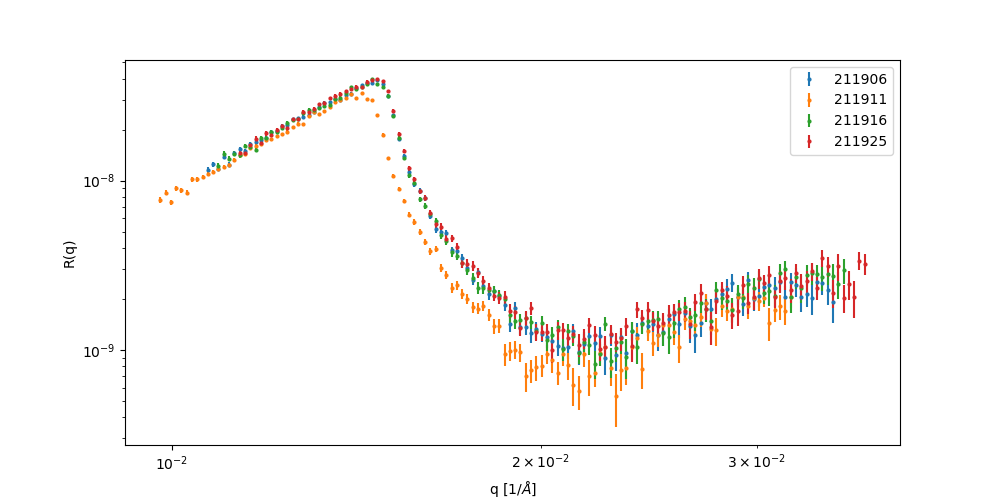

In [9]:
importlib.reload(workflow)
importlib.reload(output)
importlib.reload(event_reduction)
importlib.reload(peak_finding)
importlib.reload(template)

ipts = 33612
data_dir = os.path.expanduser('~/git/LiquidsReflectometer/reduction/data')
template_path = os.path.join(data_dir, 'template.xml')
template_path = '/SNS/REF_L/IPTS-33612/shared/autoreduce/template_down.xml'
template_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/template_down_212021.xml' % ipts

fig, ax = plt.subplots(figsize=(10,5))
seq = 1

run_number = 211906

for i in [211906, 211911, 211916, 211925]:
    ws = api.Load("REF_L_%s" % i)
    offset = workflow.offset_from_first_run(ws, template_path, output_dir=data_dir)
    workflow.reduce(ws, template_path, output_dir=data_dir, average_overlap=False,
                    theta_offset=offset)

    reduced_path = os.path.join(data_dir, 'REFL_%s_%s_%s_partial.txt' % (i, seq, i))
    if os.path.isfile(reduced_path):
        _refl = np.loadtxt(reduced_path).T
        plt.errorbar(_refl[0], _refl[1]*_refl[0]**4, yerr=_refl[2]*_refl[0]**4, markersize=4, marker='.', linestyle='', label=str(i))



plt.legend()
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()



Processing: 211998
    DB: 212021
    DB center: 261.827	 Width: 1 from [250 275]
    SC center: 232.714	 Width: 3
wl=6.2; ths=-0.450101; thi=-0.000140031; offset=0.019172; theta used=-0.430929
Reduction settings:
    sample-det: 1.355
    source-det: 15.05
    pixel: 0.0007
    WL: 2.497029801160311 9.331006099072741
    Q: 0.005 0.03784992713532975
    Theta = 0.4309289152936592
    Emission delay = True
Left side background: [100, 120]
Left side background: [100, 120]
Composite scaling factor: 4.0

Processing: 211999
    DB: 212022
wl=6.2; ths=-1.20004; thi=-0.000140031; offset=0.019172; theta used=-1.18086
Reduction settings:
    sample-det: 1.355
    source-det: 15.05
    pixel: 0.0007
    WL: 2.7861595676104525 9.331006099072741
    Q: 0.005 0.09295022389657123
    Theta = 1.180864156765658
    Emission delay = True
Background on both sides: [159 171] [189 193]
Left side background: [100, 120]
Composite scaling factor: 25.0

Processing: 212000
    DB: 212038
wl=6.2; ths=-3.50007

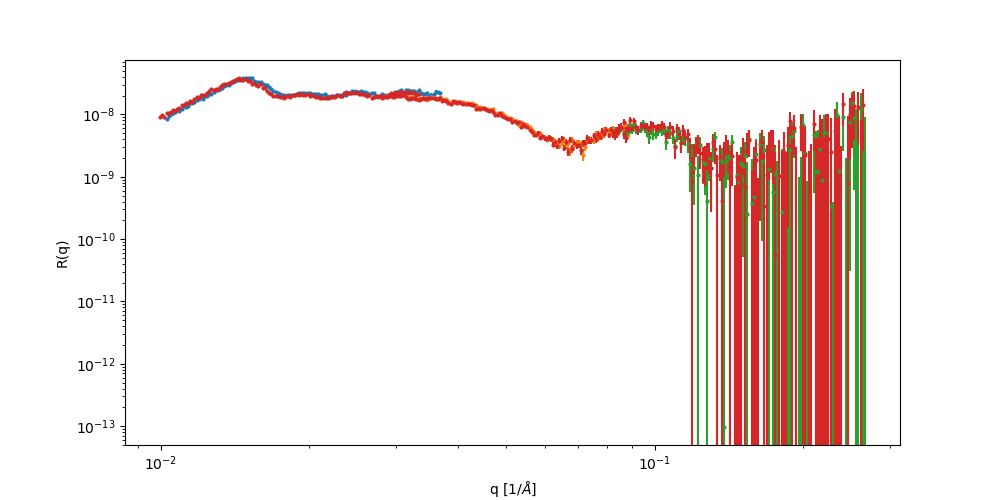

In [7]:
importlib.reload(workflow)
importlib.reload(output)
importlib.reload(event_reduction)
importlib.reload(peak_finding)
importlib.reload(template)

ipts = 33612
ipts = 32814
#ipts = 30101

data_dir = os.path.expanduser('~/git/LiquidsReflectometer/reduction/data')
template_path = os.path.join(data_dir, 'template.xml')
template_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/template_down_used_during_expt.xml' % ipts
template_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/template_down_new.xml' % ipts
#template_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/template_down_211616.xml' % ipts
template_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/template_down_212021.xml' % ipts
#template_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/template_down_pre_tthd.xml' % ipts
template_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/template_down_test.xml' % ipts
fig, ax = plt.subplots(figsize=(10,5))
seq = 1

run_number = 211906 
run_number = 211994
run_number = 211998
#run_number = 212005

for i in range(run_number, run_number+3):
    ws = api.Load("REF_L_%s" % i)

    offset = workflow.offset_from_first_run(ws, template_path, output_dir=data_dir)
    workflow.reduce(ws, template_path, output_dir=data_dir, average_overlap=False,
                    theta_offset=offset)
    
    reduced_path = os.path.join(data_dir, 'REFL_%s_%s_%s_partial.txt' % (run_number, seq, i))
    if not os.path.isfile(reduced_path):
        reduced_path = os.path.join(data_dir, 'REFL_%s_%s_%s_partial.txt' % (i, 4, i))
        print("trying ", reduced_path)

    if os.path.isfile(reduced_path):
        _refl = np.loadtxt(reduced_path).T
        plt.errorbar(_refl[0], _refl[1]*_refl[0]**4, yerr=_refl[2]*_refl[0]**4, markersize=4, marker='.', linestyle='', label='new reduction')

    seq += 1


if True:
    reduced_path = '/SNS/REF_L/IPTS-%s/shared/autoreduce/REFL_%s_combined_data_auto.txt' % (ipts, run_number)
    _refl = np.loadtxt(reduced_path).T
    plt.errorbar(_refl[0], _refl[1]*_refl[0]**4, yerr=_refl[2]*_refl[0]**4, markersize=4, marker='.', linestyle='', label='auto-reduction')


plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


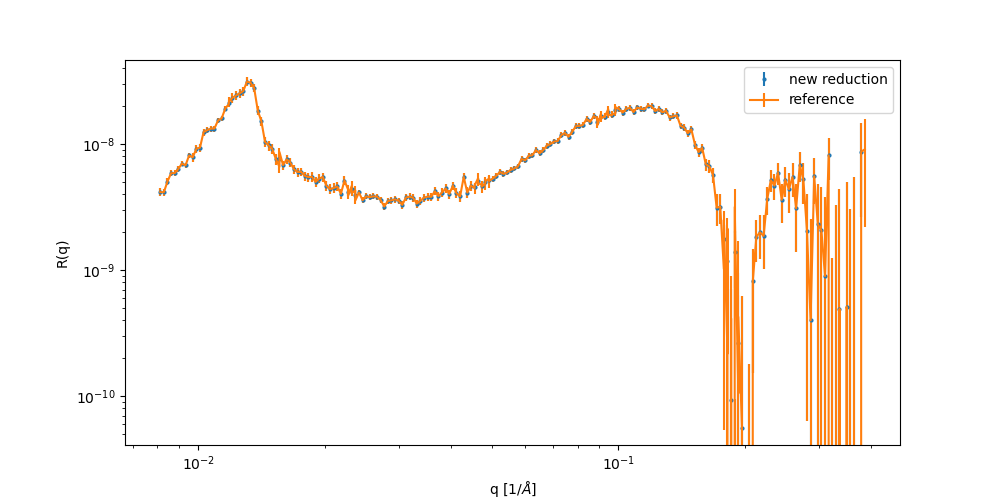

In [86]:
reduced_path = os.path.join(data_dir, 'reference_rq.txt')
if os.path.isfile(reduced_path):
    _data = np.loadtxt(reduced_path).T

reduced_path = os.path.join(data_dir, 'REFL_198409_combined_data_auto.txt')
if os.path.isfile(reduced_path):
    _refl = np.loadtxt(reduced_path).T

fig, ax = plt.subplots(figsize=(10,5))
plt.errorbar(_refl[0], _refl[1]*_refl[0]**4, yerr=_refl[2]*_refl[0]**4, markersize=4, marker='.', linestyle='', label='new reduction')
plt.errorbar(_data[0], _data[1]*_data[0]**4, yerr=_data[2]*_data[0]**4, markersize=4, marker='', linestyle='-', label='reference')

plt.legend()
plt.xlabel('q [$1/\AA$]')
plt.ylabel('R(q)')
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()


In [ ]:
_pixel_width = 0.0007
sample_detector_distance = 1.355
dirpix = 261
peak_position = 85.5
#peak_position = 210
peak_position = 126.5




x0 = _pixel_width * (peak_position - dirpix)
theta = np.arctan(x0 / sample_detector_distance) / 2.0 * 180 / np.pi
print(theta)



if False:
    for i in range(304):
        x0 = _pixel_width * (i - dirpix)
        theta = np.arctan(x0 / sample_detector_distance) / 2.0 * 180 / np.pi
        print("Pixel:%g     Theta = %g" % (i, theta))

-1.9873584584723842


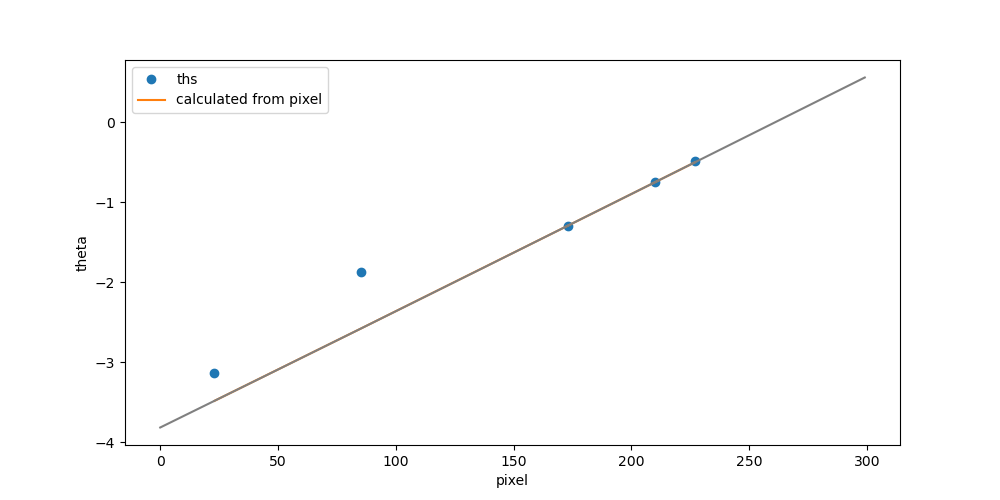

In [ ]:
ths = np.asarray([-0.48, -0.75, -1.3, -1.87, -3.14])
pix = np.asarray([227, 210, 173, 85, 23])
all_pix = np.arange(300)

x0 = _pixel_width * (pix - dirpix)
calc = np.arctan(x0 / sample_detector_distance) / 2.0 * 180 / np.pi

x0 = _pixel_width * (all_pix - dirpix)
all_calc = np.arctan(x0 / sample_detector_distance) / 2.0 * 180 / np.pi

fig, ax = plt.subplots(figsize=(10,5))
plt.plot(pix, ths, 'o', label='ths')
plt.plot(pix, calc, label='calculated from pixel')
plt.plot(all_pix, all_calc, color='gray')

plt.legend()
plt.xlabel('pixel')
plt.ylabel('theta')


plt.show()
